# Natural Language Processing

**Finding meaning or information from random text.**

**How to deal with text data**

## AI 
- A computer performing tasks that a human can do

- sentiment analysis
- topic modelling
- text generation


#### Data Science - Using data to make decisions
    - Programming -  > **Data**     Python, Sklearn, re, 
                     > **NLP**      nltk, TextBlob, gensim
                 
    - Math and Stats > **Clean**    corpus, document-term-matrix
                     > **EDA**      wordcounts
                     > **NLP**     sentiment analysis, topic modelling, text generation
                 
    - Communication  > **Design**   scope, visualize, insight
                     > **Domain**   expertise

#### 1. Question - What makes Ali Wong's comedy routine stand out.

#### 2. Data gathering and cleaning

- Where are we going to get this data
>  Obtained from text transcipt

- How much data is required, how many comedians, what time range
>  IMDB advanced search filter 10 comedians including Ali Wong
>  scrapsfromtheloft.com 

- Web scraping
>  requests, Beautiful Soup

- Saving Python Data
>  Pickle- serialise python objects, save data for later

- Data Cleaning
>  Get the data in clean format for further analysis
>  Different type of analysis require different data format

>> Corpus - is collection of texts

>> Document Term Matrix
    - Clean text
    - Tokenise Text
    - Document Term Matrix
  
> Common data cleaning steps
- remove puncuations
- remove numbers
- lowercase letters 

> Data needs to be cleaned, tokenised and put into a matrix

> The representation of text after this is called Bag of Words model, its simple format that ignores order



In [4]:
import pandas as pd
import numpy as np
import pickle


In [5]:
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']

In [6]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [7]:
data

{'louis': ['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
  '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of th

In [8]:
type(data)

dict

In [9]:
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [12]:
data['louis']#[:2]

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

Summary 
- Question - How is Ali Wong different
- Data gathering - How to scrape website and gather data
- Data cleaning - Put data into standard formats for future analysis
- Output - a corpus and a document term matrix

## Cleaning The Data

**Common data cleaning steps on all text:**
* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words

**More data cleaning steps after tokenization:**
* Stemming / lemmatization
* Parts of speech tagging
* Create bi-grams or tri-grams
* Deal with typos
* And more...

In [14]:
# Let's take a look at our data again
next(iter(data.keys()))

'louis'

In [17]:
# Notice that our dictionary is currently in key: comedian, value: list of text format
next(iter(data.values()))

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

In [29]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [32]:
# Combine it to a dictionary
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}
data_combined.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [40]:
len(data['louis'])

20

In [41]:
len(data_combined['louis'])

1

In [53]:
import pandas as pd
pd.set_option('max_colwidth', 150)

data_df = pd.DataFrame(data = data_combined).T
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...


In [54]:
data_df.shape

(12, 1)

In [55]:
# Let's take a look at the transcript for Ali Wong
data_df.transcript.loc['ali']

"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go to 

In [56]:
# Apply first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    """Make text lower case, remove punctuation, remove text in square bracket 
    and remove words containing numbers"""
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)       # removes anything that is inside the square brackets
    text = re.sub('%s' % re.escape(string.punctuation), '', text)  # Removes punctuation
    text = re.sub('\w*\d\w*', '', text)       # removes any characters with numbers
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text
    
round1 = lambda x: clean_text_round1(x)

In [57]:
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
ali,"ladies and gentlemen, please welcome to the stage: ali wong! hi. hello! welcome! thank you! thank you for coming. hello! hello. we are gonna have ..."
anthony,"thank you. thank you. thank you, san francisco. thank you so much. so good to be here. people were surprised when i told em i was gonna tape my sp..."
bill,"all right, thank you! thank you very much! thank you. thank you. thank you. how are you? whats going on? thank you. its a pleasure to be here in ..."
bo,bo what? old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this ...
dave,"this is dave. he tells dirty jokes for a living. that stare is where most of his hard work happens. it signifies a profound train of thought, the ..."
hasan,"whats up? davis, whats up? im home. i had to bring it back here. netflix said, where do you want to do the special? la, chicago, new york? i was..."
jim,"ladies and gentlemen, please welcome to the stage mr. jim jefferies! hello! sit down, sit down, sit down, sit down, sit down. thank you, bost..."
joe,"ladies and gentlemen, welcome joe rogan. what the fuck is going on, san francisco? thanks for coming. i appreciate it! god damn! put your phon..."
john,"all right, petunia. wish me luck out there. you will die on august , . thats pretty good. all right. hello. hello, chicago. nice to see you again...."
louis,introfade the music out. lets roll. hold there. lights. do the lights. thank you. thank you very much. i appreciate that. i dont necessarily agree...


## Organizing The Data

1. **Corpus - **a collection of text
2. **Document-Term Matrix - **word counts in matrix format

## Corpus

We already created a corpus in an earlier step. The definition of a corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [59]:
data_clean

,transcript
ali,"ladies and gentlemen, please welcome to the stage: ali wong! hi. hello! welcome! thank you! thank you for coming. hello! hello. we are gonna have ..."
anthony,"thank you. thank you. thank you, san francisco. thank you so much. so good to be here. people were surprised when i told em i was gonna tape my sp..."
bill,"all right, thank you! thank you very much! thank you. thank you. thank you. how are you? whats going on? thank you. its a pleasure to be here in ..."
bo,bo what? old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this ...
dave,"this is dave. he tells dirty jokes for a living. that stare is where most of his hard work happens. it signifies a profound train of thought, the ..."
hasan,"whats up? davis, whats up? im home. i had to bring it back here. netflix said, where do you want to do the special? la, chicago, new york? i was..."
jim,"ladies and gentlemen, please welcome to the stage mr. jim jefferies! hello! sit down, sit down, sit down, sit down, sit down. thank you, bost..."
joe,"ladies and gentlemen, welcome joe rogan. what the fuck is going on, san francisco? thanks for coming. i appreciate it! god damn! put your phon..."
john,"all right, petunia. wish me luck out there. you will die on august , . thats pretty good. all right. hello. hello, chicago. nice to see you again...."
louis,introfade the music out. lets roll. hold there. lights. do the lights. thank you. thank you very much. i appreciate that. i dont necessarily agree...


In [60]:
# Let's add the comedians' full names as well
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

data_clean['full_name'] = full_names
data_clean

,transcript,full_name
ali,"ladies and gentlemen, please welcome to the stage: ali wong! hi. hello! welcome! thank you! thank you for coming. hello! hello. we are gonna have ...",Ali Wong
anthony,"thank you. thank you. thank you, san francisco. thank you so much. so good to be here. people were surprised when i told em i was gonna tape my sp...",Anthony Jeselnik
bill,"all right, thank you! thank you very much! thank you. thank you. thank you. how are you? whats going on? thank you. its a pleasure to be here in ...",Bill Burr
bo,bo what? old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this ...,Bo Burnham
dave,"this is dave. he tells dirty jokes for a living. that stare is where most of his hard work happens. it signifies a profound train of thought, the ...",Dave Chappelle
hasan,"whats up? davis, whats up? im home. i had to bring it back here. netflix said, where do you want to do the special? la, chicago, new york? i was...",Hasan Minhaj
jim,"ladies and gentlemen, please welcome to the stage mr. jim jefferies! hello! sit down, sit down, sit down, sit down, sit down. thank you, bost...",Jim Jefferies
joe,"ladies and gentlemen, welcome joe rogan. what the fuck is going on, san francisco? thanks for coming. i appreciate it! god damn! put your phon...",Joe Rogan
john,"all right, petunia. wish me luck out there. you will die on august , . thats pretty good. all right. hello. hello, chicago. nice to see you again....",John Mulaney
louis,introfade the music out. lets roll. hold there. lights. do the lights. thank you. thank you very much. i appreciate that. i dont necessarily agree...,Louis C.K.


In [62]:
# Let's pickle it for later use
data_clean.to_pickle("corpus_clean.pkl")

## Document-Term Matrix

For many of the techniques we'll be using in  notebooks, the text must be **tokenized**, meaning broken down into smaller pieces. 

The most common tokenization technique is to break down text into words. We can do this using scikit-learn's **CountVectorizer**, where 
- every row will represent a different document and 
- every column will represent a different word.

In addition, with CountVectorizer, we can **remove stop words**. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.


In [64]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words= 'english')
data_cv = cv.fit_transform(data_clean.transcript)
data_cv

<12x7267 sparse matrix of type '<class 'numpy.int64'>'
	with 16462 stored elements in Compressed Sparse Row format>

In [65]:
cv.get_feature_names()

['aaaaah',
 'aaaaahhhhhhh',
 'aaaaauuugghhhhhh',
 'aaaahhhhh',
 'aaah',
 'aah',
 'abc',
 'abcs',
 'ability',
 'abject',
 'able',
 'abortion',
 'abortions',
 'abroad',
 'abso',
 'absolute',
 'absolutely',
 'absorb',
 'absorbing',
 'abstain',
 'abuse',
 'abused',
 'academically',
 'acc',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'access',
 'accident',
 'accidentally',
 'accomplished',
 'accomplishments',
 'according',
 'accordingly',
 'accoutrements',
 'accurate',
 'accustomed',
 'accutane',
 'achieve',
 'achievement',
 'acid',
 'acknowledge',
 'acknowledging',
 'acoustic',
 'acquisitions',
 'acquitted',
 'act',
 'acting',
 'action',
 'actions',
 'activate',
 'active',
 'activity',
 'actor',
 'actors',
 'acts',
 'actual',
 'actually',
 'ad',
 'adam',
 'adams',
 'add',
 'added',
 'adding',
 'address',
 'adhere',
 'adjectives',
 'adjourned',
 'adjustments',
 'admired',
 'admirers',
 'admit',
 'admittedly',
 'adopt',
 'adopting',
 'adorable',
 'adore',
 '

In [67]:
data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_dtm

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
3,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [68]:
data_dtm.index = data_clean.index
data_dtm.head()

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [70]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')

In [71]:
pickle.dump(cv, open("cv.pkl", "wb"))

## Exploratory Data Analysis

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

- 1 Most common words - find these and create word clouds
- 2 Size of vocabulary - look number of unique words and also how quickly someone speaks
- 3 Amount of profanity - most common terms

## Most Common Words

### Analysis

In [155]:
# Continue with document term matrix
data = data_dtm.T.copy()

data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [156]:
data.shape

(7267, 12)

In [131]:
# Here the top 30 words are filtered after sorting then saved to dictionary
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

len(top_dict)

12

In [133]:
top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 68),
  ('just', 64),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('oh', 21),
  ('wanna', 21),
  ('gotta', 21),
  ('husband', 20),
  ('right', 19),
  ('got', 19),
  ('time', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('need', 14),
  ('hes', 14),
  ('god', 14),
  ('asian', 14),
  ('half', 14),
  ('yeah', 13),
  ('tell', 13)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('anthony', 27),
  ('say', 26),
  ('just', 26),
  ('day', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('think', 18),
  ('right', 18),
  ('grandma', 18),
  ('thing', 17),
  ('time', 17),
  ('yeah', 17),
  ('school', 16),
  ('good', 16),
  ('did', 16),
  ('jokes', 16),
  ('okay', 15),
  ('ive', 15),
  ('gonna', 15),
  ('baby', 15)],
 '

In [135]:
top_dict['ali']

[('like', 126),
 ('im', 74),
 ('know', 68),
 ('just', 64),
 ('dont', 61),
 ('thats', 34),
 ('shit', 34),
 ('youre', 31),
 ('gonna', 28),
 ('ok', 26),
 ('lot', 24),
 ('oh', 21),
 ('wanna', 21),
 ('gotta', 21),
 ('husband', 20),
 ('right', 19),
 ('got', 19),
 ('time', 19),
 ('cause', 18),
 ('women', 17),
 ('day', 17),
 ('people', 16),
 ('pregnant', 15),
 ('need', 14),
 ('hes', 14),
 ('god', 14),
 ('asian', 14),
 ('half', 14),
 ('yeah', 13),
 ('tell', 13)]

In [136]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, oh, wanna, gotta
---
anthony
im, like, know, dont, joke, got, said, thats, anthony, say, just, day, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
bo
know, like, im, think, love, just, bo, stuff, repeat, dont, yeah, want, right, cos
---
dave
like, know, ah, said, just, im, shit, people, didnt, dont, time, thats, fuck, fucking
---
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
---
jim
like, im, dont, right, fucking, know, just, went, youre, people, thats, oh, day, think
---
joe
like, people, just, dont, im, fucking, fuck, thats, gonna, theyre, know, youre, think, shit
---
john
like, know, just, dont, said, clinton, im, old, thats, right, youre, little, hey, time
---
louis
like, just, know, dont, thats, youre, im, life, people, thing, hes, gonna, cause, theres
---
mike
like, im, know, said, just, dont, thats, think

NOTE: At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.

In [158]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
words


['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'oh',
 'wanna',
 'gotta',
 'husband',
 'right',
 'got',
 'time',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'need',
 'hes',
 'god',
 'asian',
 'half',
 'yeah',
 'tell',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'said',
 'thats',
 'anthony',
 'say',
 'just',
 'day',
 'guys',
 'people',
 'tell',
 'youre',
 'think',
 'right',
 'grandma',
 'thing',
 'time',
 'yeah',
 'school',
 'good',
 'did',
 'jokes',
 'okay',
 'ive',
 'gonna',
 'baby',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'fuck',
 'think',
 'want',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'old',
 'come',
 'going',
 'thing',
 'theyre',
 'let',
 'theres',
 'know',
 'like',
 'im',
 'think',
 'love',
 'just',
 'bo',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'eye',
 'people',
 'said',
 'fucking'

In [142]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common(40)

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('gonna', 8),
 ('think', 8),
 ('time', 7),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('say', 6),
 ('fucking', 6),
 ('going', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('didnt', 5),
 ('theyre', 5),
 ('theres', 5),
 ('really', 5),
 ('did', 4),
 ('fuck', 4),
 ('ive', 3),
 ('make', 3),
 ('old', 3),
 ('man', 3),
 ('little', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2)]

In [143]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'gonna',
 'think',
 'time',
 'yeah',
 'said']

In [144]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

In [145]:
#Read in cleaned data
data_clean.head()

,transcript,full_name
ali,"ladies and gentlemen, please welcome to the stage: ali wong! hi. hello! welcome! thank you! thank you for coming. hello! hello. we are gonna have ...",Ali Wong
anthony,"thank you. thank you. thank you, san francisco. thank you so much. so good to be here. people were surprised when i told em i was gonna tape my sp...",Anthony Jeselnik
bill,"all right, thank you! thank you very much! thank you. thank you. thank you. how are you? whats going on? thank you. its a pleasure to be here in ...",Bill Burr
bo,bo what? old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this ...,Bo Burnham
dave,"this is dave. he tells dirty jokes for a living. that stare is where most of his hard work happens. it signifies a profound train of thought, the ...",Dave Chappelle


In [146]:
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


In [161]:
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index
data_stop

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [164]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords = stop_words, 
               background_color = "black", 
               colormap = "Dark2",
               max_font_size = 150, 
               random_state = 42)


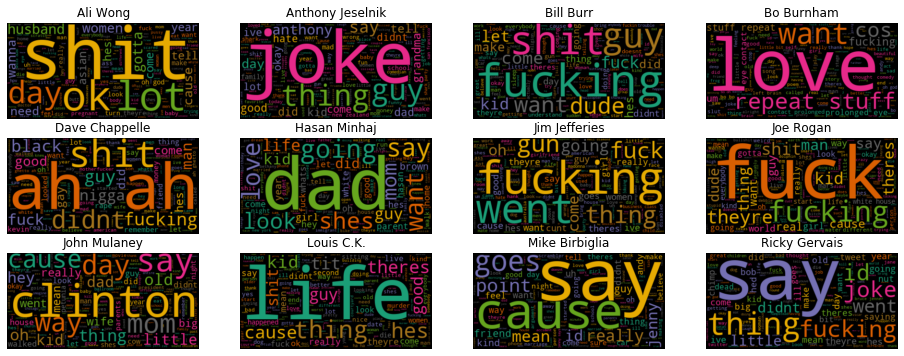

In [165]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings
- Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
- A lot of people use the F-word. Let's dig into that later.

## Number of Words

In [173]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

unique_list

[1322, 973, 1624, 1275, 1383, 1560, 1312, 1427, 1386, 1089, 1482, 1629]

In [171]:
#Create a new DataFrame that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns = ['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by = 'unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,973
9,Louis C.K.,1089
3,Bo Burnham,1275
6,Jim Jefferies,1312
0,Ali Wong,1322
4,Dave Chappelle,1383
8,John Mulaney,1386
7,Joe Rogan,1427
10,Mike Birbiglia,1482
5,Hasan Minhaj,1560


In [175]:
# Calculate the words per minute of each comedian
# Find the total number of words that the comedian uses

total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
total_list

[3320, 2911, 5570, 3186, 4153, 4809, 4777, 4607, 4035, 3354, 4764, 4989]

In [176]:
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

In [178]:
# lets add some columns to our dataframe

data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words']/data_words['run_times']
data_words

,comedian,unique_words,total_words,run_times,words_per_minute
0,Ali Wong,1322,3320,60,55.333333
1,Anthony Jeselnik,973,2911,59,49.338983
2,Bill Burr,1624,5570,80,69.625000
3,Bo Burnham,1275,3186,60,53.100000
4,Dave Chappelle,1383,4153,67,61.985075
5,Hasan Minhaj,1560,4809,73,65.876712
6,Jim Jefferies,1312,4777,77,62.038961
7,Joe Rogan,1427,4607,63,73.126984
8,John Mulaney,1386,4035,62,65.080645
9,Louis C.K.,1089,3354,58,57.827586


In [179]:
# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,973,2911,59,49.338983
3,Bo Burnham,1275,3186,60,53.100000
0,Ali Wong,1322,3320,60,55.333333
9,Louis C.K.,1089,3354,58,57.827586
4,Dave Chappelle,1383,4153,67,61.985075
6,Jim Jefferies,1312,4777,77,62.038961
10,Mike Birbiglia,1482,4764,76,62.684211
11,Ricky Gervais,1629,4989,79,63.151899
8,John Mulaney,1386,4035,62,65.080645
5,Hasan Minhaj,1560,4809,73,65.876712


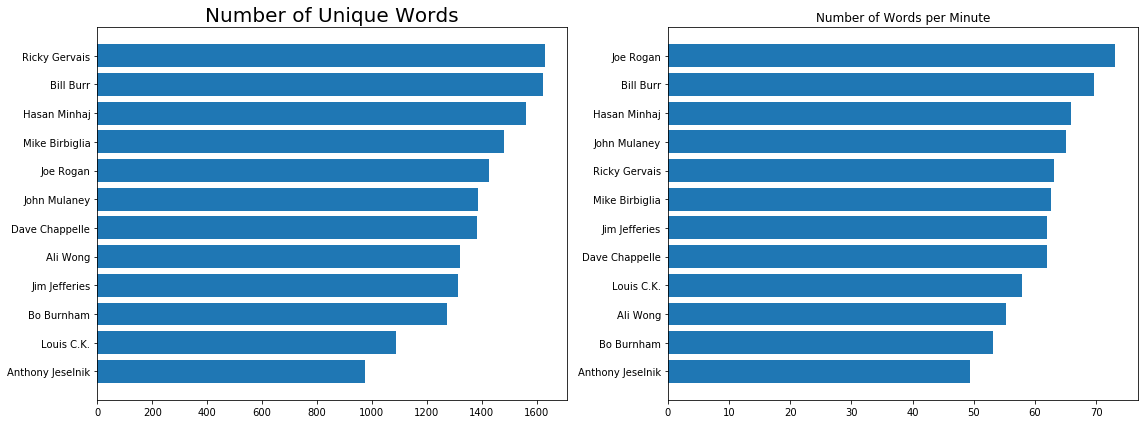

In [182]:
# Lets plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align = 'center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize = 20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align = 'center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words per Minute')

plt.tight_layout()
plt.show()

### Findings
#### Vocabulary
- Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
- Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary
#### Talking Speed
- Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
- Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
- Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

## Amount of Profanity

obscene language or irreverent behaviour

### Analysis

In [183]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('gonna', 8),
 ('think', 8),
 ('time', 7),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('say', 6),
 ('fucking', 6),
 ('going', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('didnt', 5),
 ('theyre', 5),
 ('theres', 5),
 ('really', 5),
 ('did', 4),
 ('fuck', 4),
 ('ive', 3),
 ('make', 3),
 ('old', 3),
 ('man', 3),
 ('little', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('dude', 2),
 ('guy', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('gotta', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('asian', 1),
 ('half', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('school', 1),
 ('j

In [184]:
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [186]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_bad_words

,fucking,fuck,shit
ali,5,11,34
anthony,6,9,11
bill,70,37,63
bo,22,15,6
dave,32,33,46
hasan,9,16,15
jim,78,38,21
joe,69,66,40
john,2,2,6
louis,6,15,26


In [192]:
data_profanity = pd.concat([(data_bad_words.fucking + data_bad_words.fuck) , (data_bad_words.shit)], axis = 1)
data_profanity

,0,shit
ali,16,34
anthony,15,11
bill,107,63
bo,37,6
dave,65,46
hasan,25,15
jim,116,21
joe,135,40
john,4,6
louis,21,26


In [193]:
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,11
bill,107,63
bo,37,6
dave,65,46
hasan,25,15
jim,116,21
joe,135,40
john,4,6
louis,21,26


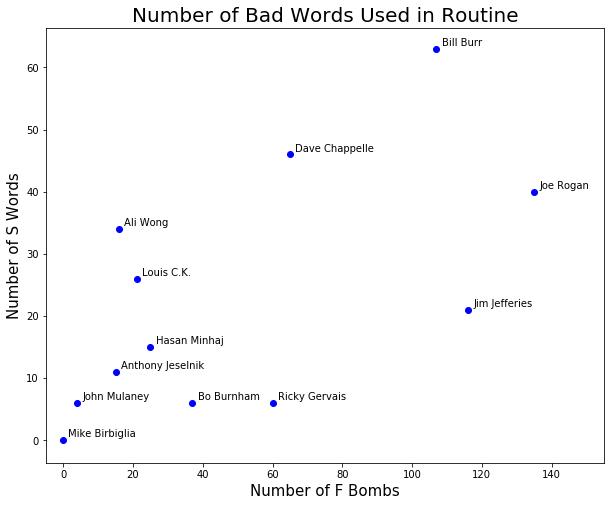

In [194]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings
**Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.

**Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

### Side Note
What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.


In [221]:
# Let's isolate just these bad words
data_bad_words2 = data.transpose()[['black', 'white', 'asian', 'chinese', 'african']]
data_bad_words2

,black,white,asian,chinese,african
ali,4,12,14,6,0
anthony,1,2,0,0,0
bill,1,8,0,0,0
bo,1,2,0,0,0
dave,31,12,6,0,2
hasan,0,20,0,0,1
jim,6,7,2,0,4
joe,2,24,0,1,0
john,3,4,0,3,0
louis,1,2,0,1,0


In [223]:
# Let's isolate just these bad words
data_bad_words3 = data.transpose()[['love', 'hate']]
data_bad_words3

,love,hate
ali,6,0
anthony,9,14
bill,17,3
bo,37,3
dave,6,0
hasan,34,4
jim,14,11
joe,5,0
john,5,1
louis,11,1


## Sentiment Analysis

### Introduction
So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.

    - **Polarity:** How positive or negative a word is. **-1 is very negative. +1 is very positive.**
    - **Subjectivity:** How subjective, or opinionated a word is. **0 is fact. +1 is very much an opinion.**

For more info on how TextBlob coded up its sentiment function.

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

### Sentiment of Routine

**Input** - Corpus - The reason we are not using document-term-matrix here is because order matters
>  'great' = positive, 'not great' = negative

**TextBlob** is a Python library built on top of nltk. It is easier to use and provides some additional functionality such as **rule based sentiment scores.**(Note it does this in very basic way)

**Output** - for each comedian we ll give them a **sentiment score(how positive/negative)** they are
and give them a **subjectivity score(how opiniated they are)**

**TextBlob** finds all the words and phrases that it can assign a polarity and subjectivity to, **and averages all of them together**

**Output** - each comedian is assigned one polarity and one subjectivity score

While not the most sophesticated technique its a good starting point

This rule based implementation is a knowledge based technique. There are also Statistical based techniques out there such as **Naive Bayes**

In [231]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus_clean.pkl')
data.head(10)

,transcript,full_name
ali,"ladies and gentlemen, please welcome to the stage: ali wong! hi. hello! welcome! thank you! thank you for coming. hello! hello. we are gonna have ...",Ali Wong
anthony,"thank you. thank you. thank you, san francisco. thank you so much. so good to be here. people were surprised when i told em i was gonna tape my sp...",Anthony Jeselnik
bill,"all right, thank you! thank you very much! thank you. thank you. thank you. how are you? whats going on? thank you. its a pleasure to be here in ...",Bill Burr
bo,bo what? old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this ...,Bo Burnham
dave,"this is dave. he tells dirty jokes for a living. that stare is where most of his hard work happens. it signifies a profound train of thought, the ...",Dave Chappelle
hasan,"whats up? davis, whats up? im home. i had to bring it back here. netflix said, where do you want to do the special? la, chicago, new york? i was...",Hasan Minhaj
jim,"ladies and gentlemen, please welcome to the stage mr. jim jefferies! hello! sit down, sit down, sit down, sit down, sit down. thank you, bost...",Jim Jefferies
joe,"ladies and gentlemen, welcome joe rogan. what the fuck is going on, san francisco? thanks for coming. i appreciate it! god damn! put your phon...",Joe Rogan
john,"all right, petunia. wish me luck out there. you will die on august , . thats pretty good. all right. hello. hello, chicago. nice to see you again....",John Mulaney
louis,introfade the music out. lets roll. hold there. lights. do the lights. thank you. thank you very much. i appreciate that. i dont necessarily agree...,Louis C.K.


In [232]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

In [233]:
pol = lambda x : TextBlob(x).sentiment.polarity
sub = lambda x : TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"ladies and gentlemen, please welcome to the stage: ali wong! hi. hello! welcome! thank you! thank you for coming. hello! hello. we are gonna have ...",Ali Wong,0.069239,0.479597
anthony,"thank you. thank you. thank you, san francisco. thank you so much. so good to be here. people were surprised when i told em i was gonna tape my sp...",Anthony Jeselnik,0.046428,0.565222
bill,"all right, thank you! thank you very much! thank you. thank you. thank you. how are you? whats going on? thank you. its a pleasure to be here in ...",Bill Burr,0.007638,0.544296
bo,bo what? old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this ...,Bo Burnham,0.075342,0.554579
dave,"this is dave. he tells dirty jokes for a living. that stare is where most of his hard work happens. it signifies a profound train of thought, the ...",Dave Chappelle,-0.005265,0.515403
hasan,"whats up? davis, whats up? im home. i had to bring it back here. netflix said, where do you want to do the special? la, chicago, new york? i was...",Hasan Minhaj,0.080124,0.464121
jim,"ladies and gentlemen, please welcome to the stage mr. jim jefferies! hello! sit down, sit down, sit down, sit down, sit down. thank you, bost...",Jim Jefferies,0.034501,0.538653
joe,"ladies and gentlemen, welcome joe rogan. what the fuck is going on, san francisco? thanks for coming. i appreciate it! god damn! put your phon...",Joe Rogan,0.001645,0.556626
john,"all right, petunia. wish me luck out there. you will die on august , . thats pretty good. all right. hello. hello, chicago. nice to see you again....",John Mulaney,0.077249,0.492139
louis,introfade the music out. lets roll. hold there. lights. do the lights. thank you. thank you very much. i appreciate that. i dont necessarily agree...,Louis C.K.,0.050529,0.523858


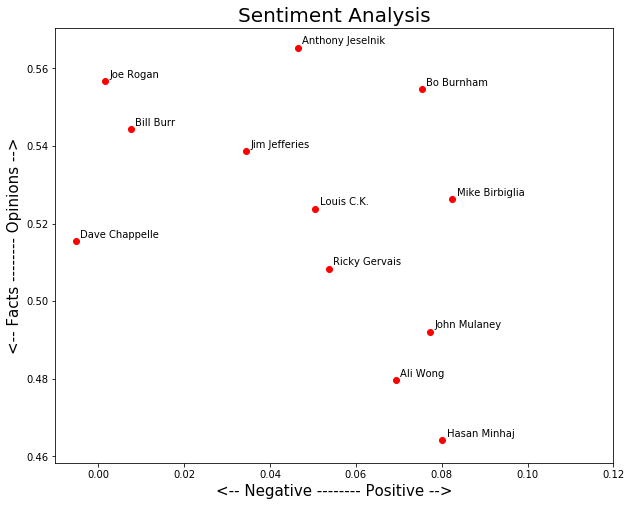

In [235]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Sentiment of Routine Over Time
Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [236]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [237]:
# Let's take a look at our data again
data.head()

,transcript,full_name,polarity,subjectivity
ali,"ladies and gentlemen, please welcome to the stage: ali wong! hi. hello! welcome! thank you! thank you for coming. hello! hello. we are gonna have ...",Ali Wong,0.069239,0.479597
anthony,"thank you. thank you. thank you, san francisco. thank you so much. so good to be here. people were surprised when i told em i was gonna tape my sp...",Anthony Jeselnik,0.046428,0.565222
bill,"all right, thank you! thank you very much! thank you. thank you. thank you. how are you? whats going on? thank you. its a pleasure to be here in ...",Bill Burr,0.007638,0.544296
bo,bo what? old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this ...,Bo Burnham,0.075342,0.554579
dave,"this is dave. he tells dirty jokes for a living. that stare is where most of his hard work happens. it signifies a profound train of thought, the ...",Dave Chappelle,-0.005265,0.515403


In [238]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['ladies and gentlemen, please welcome to the stage: ali wong! hi. hello! welcome! thank you! thank you for coming. hello! hello. we are gonna have to get this shit over with, cause i have to pee in, like, ten minutes. but thank you, everybody, so much for coming. um its a very exciting day for me. its been a very exciting year for me. i turned  this year. yes! thank you, five people. i appreciate that. uh, i can tell that im getting older, because, now, when i see an -year-old girl, my automatic thought is fuck you. fuck you. i dont even know you, but fuck you! cause im straight up jealous. im jealous, first and foremost, of their metabolism. because -year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? they got that-that beautiful inner thigh clearance where they put their feet together and theres that huge gap here with the light of potential just radiating through.and then, when they go to sleep, they just go to sleep. right? they do

In [239]:
# The list has 10 elements, one for each transcript
len(list_pieces)

12

In [240]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [241]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.11253228410008072,
  0.04920308762774517,
  0.09398690120521107,
  0.09297492784992784,
  -0.018694581280788183,
  0.09453615586097047,
  0.06481383778258779,
  0.0797113997113997,
  0.030089690638160044,
  0.07351994851994852],
 [0.12141489854452822,
  -0.050051652892561985,
  -0.04624847374847379,
  0.000310606060606069,
  0.15882883456412872,
  0.05693403590944573,
  0.0560258358662614,
  0.11501405423280421,
  -0.05070608684245053,
  0.07612878787878785],
 [-0.02712069676355391,
  -0.0003781436817151114,
  0.01023893334499395,
  0.005539066713309129,
  -0.040681646395932115,
  0.05628047782686957,
  0.016549040648616915,
  -0.02334573412698413,
  -0.01702920117322293,
  0.09731959141681366],
 [0.17709488272921117,
  -0.010188052035330266,
  -0.04908672924297924,
  0.09381141345427058,
  0.026290263408907475,
  0.027091149591149583,
  -0.0815159574468085,
  0.04254987297858391,
  0.23058256241475417,
  0.24912698412698409],
 [-0.049526045159847994,
  -0.06977813852813854,
  0.03

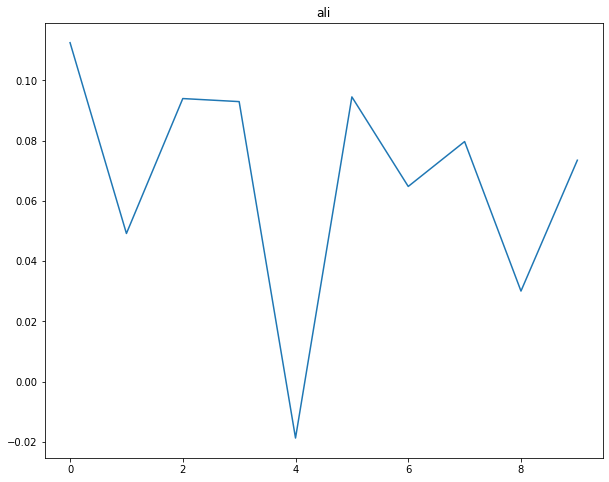

In [242]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

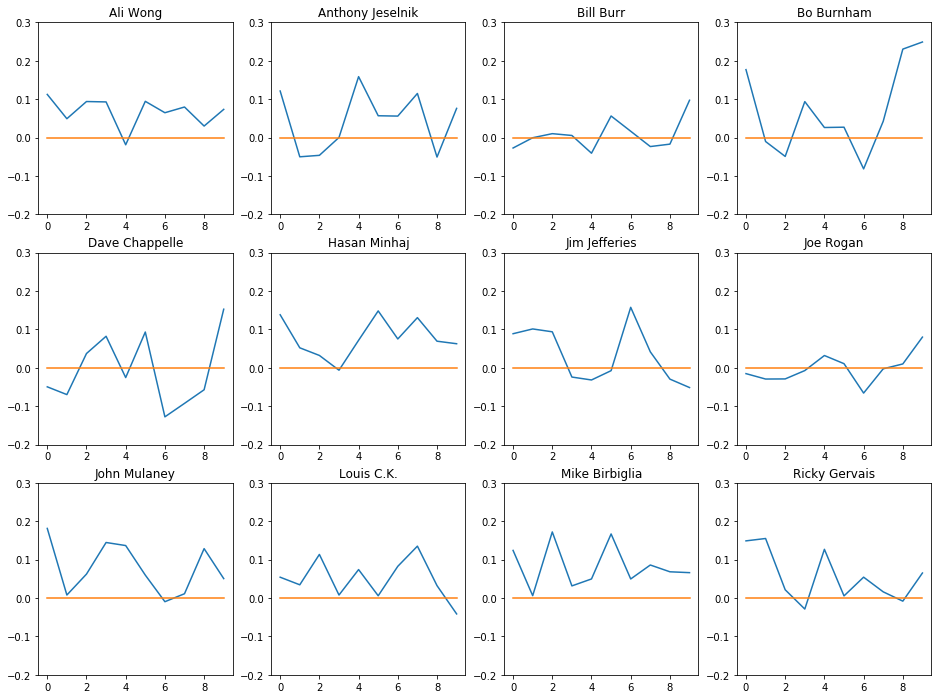

In [243]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

- Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbiglia.

- On the other hand, you have some pretty different patterns here like Bo Burnham who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine.

In [ ]:
References
Thankyou
https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/
https://youtu.be/xvqsFTUsOmc